In [ ]:
## GT Account: mwhite315
## CS 7641: Machine Learning
## Unsupervised Learning and Dimensionality Reduction
## Dataset: Twitter
# Description: Code to run 6 different Unsupervised Learning Algorithms
#
#

In [75]:
import numpy as np
import pandas as pd
import gensim
import cPickle as pickle
from sklearn.decomposition import FastICA
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import tree, model_selection, svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import graphviz
import matplotlib.pyplot as plt


In [27]:
## Dataset 1

with open('twitter_sentiment/pos_tweets.db','rb') as infile:
    pos_tweets = pickle.load(infile)
    pos_tweets = np.array(pos_tweets)
    pos_tweets = pos_tweets.reshape((len(pos_tweets),1))
    
with open('twitter_sentiment/neg_tweets.db','rb') as infile:
    neg_tweets = pickle.load(infile)
    neg_tweets = np.array(neg_tweets)
    neg_tweets = neg_tweets.reshape((len(neg_tweets),1))

## Since there are ~3 times more negative than positive, randomly subset the negative tweets

subset = np.random.choice(len(neg_tweets), len(pos_tweets), replace=False)
sub_neg_tweets = neg_tweets[subset]

## Add class labels for negative (0) and positive (1) tweets
neg = np.zeros(neg_tweets.shape)
pos = np.ones(pos_tweets.shape)
sub_neg = np.ones(sub_neg_tweets.shape)

## Split into Test and Train
X = np.vstack((pos_tweets,sub_neg_tweets))
y = np.vstack((pos, sub_neg))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Export Test and Training Sets

np.save('3_mwhite315/data/d1_x_train', X_train)
np.save('3_mwhite315/data/d1_x_test', X_test)
np.save('3_mwhite315/data/d1_y_train', y_train)
np.save('3_mwhite315/data/d1_y_test', y_test)

## Vetorize Train and Test Tweets
train_tweets = X_train.tolist()
train_tweets = [item for sublist in train_tweets for item in sublist]
test_tweets = X_test.tolist()
test_tweets = [item for sublist in test_tweets for item in sublist]

train_vec = TfidfVectorizer(stop_words='english')
train_tweets = train_vec.fit_transform(train_tweets)
test_vec = TfidfVectorizer(stop_words='english')
test_tweets = test_vec.fit_transform(test_tweets)

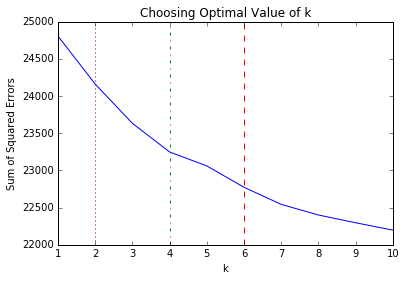

In [28]:
## k-means clustering

# Find Optimal value of K
elbow_k = []
elbow_interia = []
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(train_tweets)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    elbow_k.append(k)
    elbow_interia.append(interia)

## Plot Results
fig, ax = plt.subplots()

ax.plot(elbow_k, elbow_interia, c = 'blue')
plt.axvline(x=6, c='red', ls='dashed')
plt.axvline(x=4, c='green', ls='-.')
plt.axvline(x=2, c='purple', ls='dotted')
ax.set_xlabel("k")
ax.set_ylabel("Sum of Squared Errors")
plt.title("Choosing Optimal Value of k")
plt.savefig('3_mwhite315/optimal_k.png')
plt.show()


In [46]:
## K-Means
true_k = 2
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
train_predict = km.fit(train_tweets, y_train)
order_centroids = km.cluster_centers_
k_pred = km.predict(train_tweets)

print("Top terms per cluster:")
terms = train_vec.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
    
## Plot Results
fig, ax = plt.subplots()

ax.plot(order_centroids[:,0], order_centroids[:,1], marker="x", color='r', ls='None')
plt.title("Clusters Centroids")
plt.savefig('3_mwhite315/centroids.png')
plt.show()

Top terms per cluster:
Cluster 0:

TypeError: list indices must be integers, not numpy.float64

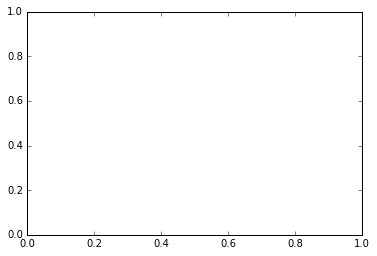

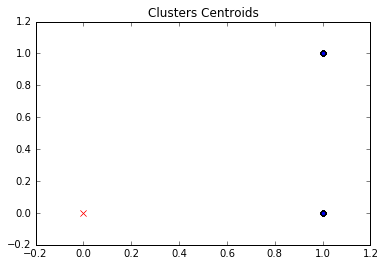

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_train, k_pred)
ax.plot(order_centroids[:,0], order_centroids[:,1], marker="x", color='r', ls='None')
plt.title("Clusters Centroids")
plt.savefig('3_mwhite315/centroids.png')
plt.show()

In [50]:
k_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
## Expectation Maximization
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6)
gmm.fit(train_tweets)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
 
plt.contour(X, Y, Z)
plt.scatter(train_tweets[:, 0], train_tweets[:, 1])
plt.savefig('3_mwhite315/tweets_em.png')
plt.show()

In [69]:
## Dataset 3
di = pd.read_csv('3_mwhite315/data/diabetic_data.csv')
di['diabetesMed'] = di.diabetesMed.eq('Yes').mul(1)
pos_di = di[di['diabetesMed'] == 1].sample(n=23403)
neg_di = di[di['diabetesMed'] == 0]
data = pos_di.append(neg_di)
X = data.drop('diabetesMed', axis=1)
X = X.select_dtypes(['number'])
y = data['diabetesMed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Export Test and Training Sets
X_train.to_csv('3_mwhite315/data/d3_x_train.csv', index=False)
X_test.to_csv('3_mwhite315/data/d3_x_test.csv', index=False)
y_train.to_csv('3_mwhite315/data/d3_y_train.csv', index=False)
y_test.to_csv('3_mwhite315/data/d3_y_test.csv', index=False)

In [72]:
## K-Means
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
sca_train = scaler.transform(X_train)
sca_test = scaler.transform(X_test)

true_k = 6
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
train_predict = km.fit(sca_train, y_train)
k_pred = km.predict(sca_test)

p_accuracy = []
a = accuracy_score(y_test, k_pred)
p_accuracy.append(a)

# Add PCA
for val in range(1,5):
    pca = PCA(val)
    pca.fit(X_train)
    p_train = pca.transform(sca_train)
    p_test = pca.transform(sca_test)
    
    true_k = 6
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    train_predict = km.fit(p_train, y_train)
    p_pred = km.predict(p_train)
    

    # Catch Accuracy
    a = accuracy_score(y_train, p_pred)
    p_accuracy.append(a)

print p_accuracy
print range(5)


[0.17635120700704979, 0.43112381155859419, 0.24650144215361608, 0.22417476765302852, 0.26236513193034933]
[0, 1, 2, 3, 4]


In [76]:
# Compute ICA
# Add ICA
l_accuracy = []
a = accuracy_score(y_test, k_pred)
l_accuracy.append(a)

# Add LCA
for val in range(1,5):
    lca = FastICA(val)
    lca.fit(X_train)
    l_train = lca.transform(sca_train)
    l_test = lca.transform(sca_test)
    
    true_k = 6
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    train_predict = km.fit(l_train, y_train)
    l_pred = km.predict(l_train)
    

    # Catch Accuracy
    a = accuracy_score(y_train, l_pred)
    l_accuracy.append(a)

print l_accuracy
print range(5)

[0.17635120700704979, 0.42036107253498556, 0.34419399636790943, 0.23576540967845316, 0.17978848413631021]
[0, 1, 2, 3, 4]


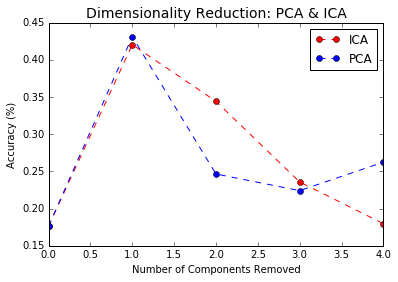

In [85]:
fig, ax = plt.subplots()
ax.plot(range(5), l_accuracy, c = "red", marker='o', linestyle='dashed', label = 'ICA')
ax.plot(range(5), p_accuracy, c = "blue", marker='o', linestyle='dashed', label = 'PCA')
ax.legend()
plt.title("Dimensionality Reduction: PCA & ICA", fontsize=14)
ax.set_xlabel("Number of Components Removed")
ax.set_ylabel("Accuracy (%)")
plt.savefig('k_means_pca_ica.png')
plt.show()

In [81]:
from sklearn.feature_selection import VarianceThreshold

v_accuracy = []
a = accuracy_score(y_test, k_pred)
v_accuracy.append(a)

t_out = []
for val in range(1,5):
    thresh = val * .2
    var = VarianceThreshold(threshold=(thresh * (1 - thresh)))
    var.fit(sca_train)
    v_train = var.transform(sca_train)
    v_test = var.transform(sca_test)
    
    true_k = 6
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
    train_predict = km.fit(v_train, y_train)
    v_pred = km.predict(v_train)
    

    # Catch Accuracy
    a = accuracy_score(y_train, v_pred)
    v_accuracy.append(a)
    t_out.append(thresh)
    
t_out.append(1)
print v_accuracy
print range(1, 5)

[0.17635120700704979, 0.20542677064416195, 0.149449845102019, 0.18454224975964106, 0.1847559021472065]
[1, 2, 3, 4]


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


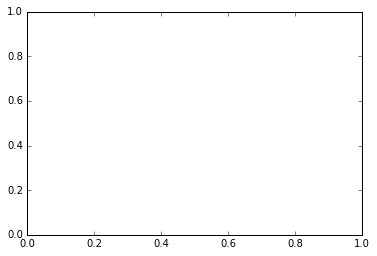

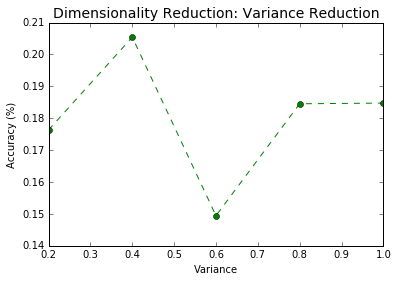

In [82]:
fig, ax = plt.subplots()
ax.plot(t_out, v_accuracy, c = "green", marker='o', linestyle='dashed')
plt.title("Dimensionality Reduction: Variance Reduction", fontsize=14)
ax.set_xlabel("Variance")
ax.set_ylabel("Accuracy (%)")
plt.savefig('k_means_var.png')
plt.show()

In [83]:
## Recursive Feature Elimination

from sklearn.svm import SVR
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel

svr = SVR(kernel="linear")
rfe = RFE(svr, 5, step=1)
rfe.fit(sca_train, y_train)
r_train = rfe.transform(sca_train)
r_test = rfe.transform(sca_test)

true_k = 6
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
train_predict = km.fit(r_train, y_train)
r_pred = km.predict(r_train)
    

# Catch Accuracy
accuracy_score(y_train, r_pred)

ValueError: Found input variables with inconsistent numbers of samples: [9362, 37444]

In [84]:
accuracy_score(y_train, r_pred)

0.20585407541929282